In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import folium
from folium.plugins import FastMarkerCluster
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import nltk
from sklearn.preprocessing import MinMaxScaler

# Step 1. Loading, checking, primary data processing:


In [ ]:
fastfood = pd.read_csv('/content/FastFoodRestaurants.csv')
df_may = pd.read_csv('Datafiniti_Fast_Food_Restaurants_May19.csv')
df = pd.read_csv('Datafiniti_Fast_Food_Restaurants.csv')

***Step 1.1:*** Checking dataset 'Datafiniti_Fast_Food_Restaurants' for Unique values

In [ ]:
restaurant_name1 = df_may['name'].unique()
len(restaurant_name1)

1545

In [ ]:
restaurant_names2 = df['name'].unique()
len(restaurant_names2)

571

In [ ]:
restaurant_names3 = fastfood['name'].unique()
len(restaurant_names3)

548

* Insight: Datasets contain different values of restaurants - so they need to be merged to do analysis on the most complete volume of dat

Duplicates will be filtered twice: on coordinated (lat, long) and on adress-zip code

In [ ]:
temp_df = pd.concat([df_may, df],ignore_index=True)

In [ ]:
temp_df = temp_df.drop_duplicates(subset=['latitude', 'longitude'],keep='first')

In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19189 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 19189 non-null  object 
 1   dateAdded          19189 non-null  object 
 2   dateUpdated        19189 non-null  object 
 3   address            19189 non-null  object 
 4   categories         19189 non-null  object 
 5   primaryCategories  9947 non-null   object 
 6   city               19189 non-null  object 
 7   country            19189 non-null  object 
 8   keys               19189 non-null  object 
 9   latitude           19189 non-null  float64
 10  longitude          19189 non-null  float64
 11  name               19189 non-null  object 
 12  postalCode         19189 non-null  object 
 13  province           19189 non-null  object 
 14  sourceURLs         19189 non-null  object 
 15  websites           19108 non-null  object 
dtypes: float64(2), object(

* What dateAdded/dateUpdated means for us? How those dates could help us with analyses?

In [ ]:
temp_df["dateUpdated"] = temp_df.apply(lambda row: pd.to_datetime(row['dateUpdated'],format='%Y-%m-%d %H:%M:%S'),axis = 1)
temp_df["dateAdded"] = temp_df.apply(lambda row: pd.to_datetime(row['dateAdded'],format='%Y-%m-%d %H:%M:%S'),axis = 1)

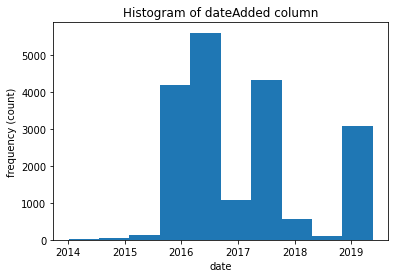

In [ ]:
plt.hist(temp_df['dateAdded'])
plt.xlabel("date")
plt.ylabel("frequency (count)")
plt.title("Histogram of dateAdded column")
plt.show()

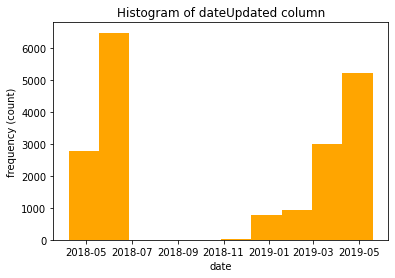

In [ ]:
plt.hist(temp_df['dateUpdated'], color="orange")
plt.xlabel("date")
plt.ylabel("frequency (count)")
plt.title("Histogram of dateUpdated column")
plt.show()

In [ ]:
temp_df[temp_df['dateUpdated']<'2019-01-01'].count()

id                   9934
dateAdded            9934
dateUpdated          9934
address              9934
categories           9934
primaryCategories     692
city                 9934
country              9934
keys                 9934
latitude             9934
longitude            9934
name                 9934
postalCode           9934
province             9934
sourceURLs           9934
websites             9927
dtype: int64

* Insight: for the reliability of the analysis, we will take data on restaurants that were updated after 01/01/2019

In [ ]:
temp_df = temp_df[temp_df['dateUpdated']>='2019-01-01']

In [ ]:
temp_df = temp_df[['address', 'city', 'latitude', 'longitude', 'name', 'postalCode', 'province']]

In [ ]:
fastfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     10000 non-null  object 
 1   city        10000 non-null  object 
 2   country     10000 non-null  object 
 3   keys        10000 non-null  object 
 4   latitude    10000 non-null  float64
 5   longitude   10000 non-null  float64
 6   name        10000 non-null  object 
 7   postalCode  10000 non-null  object 
 8   province    10000 non-null  object 
 9   websites    9535 non-null   object 
dtypes: float64(2), object(8)
memory usage: 781.4+ KB


In [ ]:
fastfood = fastfood[['address', 'city', 'latitude', 'longitude', 'name', 'postalCode', 'province']]
general_df = pd.concat([temp_df, fastfood],ignore_index=True)

In [ ]:
general_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19255 entries, 0 to 19254
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     19255 non-null  object 
 1   city        19255 non-null  object 
 2   latitude    19255 non-null  float64
 3   longitude   19255 non-null  float64
 4   name        19255 non-null  object 
 5   postalCode  19255 non-null  object 
 6   province    19255 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.0+ MB


In [ ]:
general_df = general_df.drop_duplicates(subset=['latitude', 'longitude'],keep='first')

In [ ]:
general_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19115 entries, 0 to 19254
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     19115 non-null  object 
 1   city        19115 non-null  object 
 2   latitude    19115 non-null  float64
 3   longitude   19115 non-null  float64
 4   name        19115 non-null  object 
 5   postalCode  19115 non-null  object 
 6   province    19115 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.2+ MB


In [ ]:
general_df[general_df.duplicated(['address','postalCode'])].count()

address       293
city          293
latitude      293
longitude     293
name          293
postalCode    293
province      293
dtype: int64

In [ ]:
general_df = general_df.drop_duplicates(['address','postalCode'])

# Step 2. Descriptive Analysis of FastFoodRestaurants in US

Text(0, 0.5, 'count')

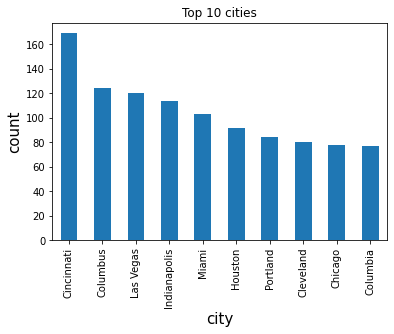

In [ ]:
cityplt=general_df.city.value_counts()[:10].plot.bar(title='Top 10 cities')
cityplt.set_xlabel('city',size=15)
cityplt.set_ylabel('count',size=15)

In [ ]:
general_df.name.value_counts()[:10]

McDonald's        2513
Burger King       1526
Taco Bell         1313
Subway             948
Wendy's            936
KFC                728
Arby's             715
Pizza Hut          580
Domino's Pizza     558
SUBWAY             436
Name: name, dtype: int64

* for some restaurants, the name is written in a different register, in order to more correctly calculate the number of restaurants in the presence - you need to bring it to one register

In [ ]:
general_df['name_of_rest'] = general_df['name'].apply(lambda x : x.lower().strip())

In [ ]:
general_df = general_df.drop(columns = ['name'],axis = 1)

Text(0, 0.5, 'count')

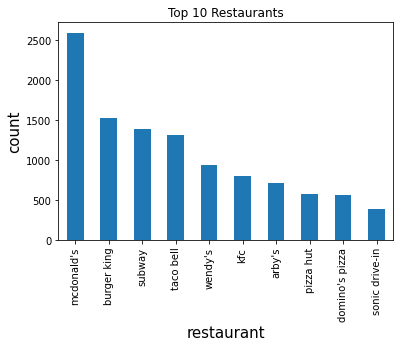

In [ ]:
nameplt=general_df.name_of_rest.value_counts()[:10].plot.bar(title="Top 10 Restaurants")
nameplt.set_xlabel('restaurant',size=15)
nameplt.set_ylabel('count',size=15)

# Step 3. Descriptive Analysis on selected cities (look the Unit Economics Data research)

In [ ]:
zooming = {'OH': 'Cincinnati', 'OH': 'Columbus', 'OH': 'Cleveland', 'FL': 'Miami', 'IN': 'Indianapolis', 'OR': 'Portland', 'AL': 'Birmingham', 'NV': 'Las Vegas'}
#zooming.update([('', ), ('', )])

In [ ]:
for city in zooming:
  print(city)

OH
FL
IN
OR
AL
NV


In [ ]:
for key, value in x.items():
  if (general_df.loc[df['province']] in x.key and general_df.loc[df['city']] in x.value):
        testtest = testtest.append(general_df, ignore_index = True )
else:
    pass

In [ ]:
list_of_cities= ['Cincinnati', 'Columbus', 'Cleveland','Miami','Indianapolis','Portland','Birmingham','Las Vegas']
list_of_province = ['OH','FL','OR','AL', 'NV']
# this data array will contain the key cities/provinces for analysis

In [ ]:
df_filter=general_df[general_df['city'].isin (list_of_cities)]

In [ ]:
goalcities=df_filter[df_filter['province'].isin (list_of_province)]

In [ ]:
goalcities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 49 to 19246
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       688 non-null    object 
 1   city          688 non-null    object 
 2   latitude      688 non-null    float64
 3   longitude     688 non-null    float64
 4   postalCode    688 non-null    object 
 5   province      688 non-null    object 
 6   name_of_rest  688 non-null    object 
dtypes: float64(2), object(5)
memory usage: 43.0+ KB


In [ ]:
goalcities['province'].value_counts()

OH    321
NV    114
FL     99
AL     77
OR     77
Name: province, dtype: int64

In [ ]:
goalcities['city'].value_counts()

Cincinnati    169
Las Vegas     114
Miami          99
Columbus       91
Portland       77
Birmingham     76
Cleveland      62
Name: city, dtype: int64

In [ ]:
goalcities[goalcities['city'] == 'Cleveland']['province'].value_counts()

OH    62
Name: province, dtype: int64

In [ ]:
uscities = pd.read_csv('/content/uscities.csv')

In [ ]:
uscities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28338 entries, 0 to 28337
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          28338 non-null  object 
 1   city_ascii    28338 non-null  object 
 2   state_id      28338 non-null  object 
 3   state_name    28338 non-null  object 
 4   county_fips   28338 non-null  int64  
 5   county_name   28338 non-null  object 
 6   lat           28338 non-null  float64
 7   lng           28338 non-null  float64
 8   population    28338 non-null  int64  
 9   density       28338 non-null  int64  
 10  source        28338 non-null  object 
 11  military      28338 non-null  bool   
 12  incorporated  28338 non-null  bool   
 13  timezone      28338 non-null  object 
 14  ranking       28338 non-null  int64  
 15  zips          28337 non-null  object 
 16  id            28338 non-null  int64  
dtypes: bool(2), float64(2), int64(5), object(8)
memory usage: 3.3+ MB


In [ ]:
uscities.head(5)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [ ]:
uscities=uscities[uscities['city'].isin (list_of_cities)]

In [ ]:
uscities['city'].value_counts()

Cleveland       17
Columbus        15
Portland        11
Miami            5
Birmingham       4
Las Vegas        2
Cincinnati       2
Indianapolis     1
Name: city, dtype: int64

In [ ]:
uscities = uscities[uscities['state_id'].isin (list_of_province)]

In [ ]:
uscities['city'].value_counts()

Cleveland     3
Miami         1
Las Vegas     1
Portland      1
Cincinnati    1
Columbus      1
Birmingham    1
Name: city, dtype: int64

In [ ]:
uscities[uscities['city'] == 'Cleveland']

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
29,Cleveland,Cleveland,OH,Ohio,39035,Cuyahoga,41.4767,-81.6804,1710093,1893,polygon,False,True,America/New_York,1,44135 44128 44119 44113 44112 44111 44110 4411...,1840000596
8794,Cleveland,Cleveland,FL,Florida,12015,Charlotte,26.9529,-81.9925,3077,226,polygon,False,False,America/New_York,3,33982,1840013128
13090,Cleveland,Cleveland,AL,Alabama,1009,Blount,33.9965,-86.5671,1306,64,polygon,False,True,America/Chicago,3,35049 35121,1840016718


In [ ]:
uscities = uscities.drop(index=[8794, 13090])

In [ ]:
uscities['city'].value_counts()

Miami         1
Las Vegas     1
Portland      1
Cleveland     1
Cincinnati    1
Columbus      1
Birmingham    1
Name: city, dtype: int64

In [ ]:
uscities = uscities[['city', 'population','density']]

In [ ]:
final_df = pd.merge(goalcities, uscities, how='left', on=['city'])

Text(0.5, 1.0, 'Number of fast food restaurants')

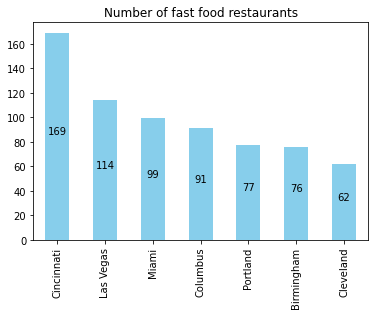

In [ ]:
graph = final_df['city'].value_counts().plot(kind='bar', color='skyblue')
for rect in graph.patches:
    height = rect.get_height()
    ypos = rect.get_y() + height/2
    graph.text(rect.get_x() + rect.get_width()/2., ypos,
            '%d' % int(height), ha='center', va='bottom')
plt.title('Number of fast food restaurants')

# Step 4. Analysis of features, adding new ones, analysis of population and population density

In [ ]:
value_counts = final_df['city'].value_counts()

# converting to df and assigning new names to columns
df_counts = pd.DataFrame(value_counts)
df_counts = df_counts.reset_index()
df_counts.columns = ['city', 'number of restaurants']

In [ ]:
df_population = pd.DataFrame([['Cincinnati', 304445], ['Columbus', 899908], ['Cleveland', 381386], ['Miami', 467103], ['Las Vegas', 653963], ['Indianapolis', 875694], ['Birmingham', 208889], ['Portland', 654378]])

df_population.rename(columns = {0:'city', 1:'population'}, inplace = True)

In [ ]:
df_counts = df_counts.merge(df_population, on='city')

In [ ]:
df_counts['rest_density'] = np.round((df_counts['population']/1000) / df_counts['number of restaurants'], 3)

In [ ]:
df_counts = df_counts.sort_values(by='rest_density', ascending=False)

Text(0.5, 1.0, 'People per restaurant (ths. people)')

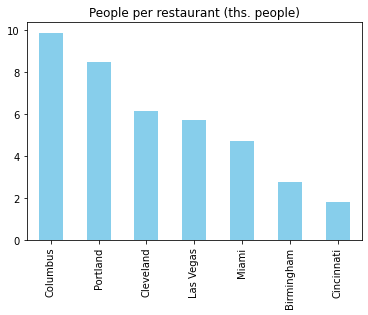

In [ ]:
graph = df_counts.plot(x='city', y='rest_density', kind='bar', color='skyblue', legend=None, xlabel='')
plt.title('People per restaurant (ths. people)')

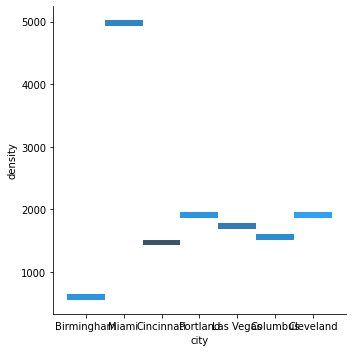

In [ ]:
sns.displot(x=final_df['city'],y=final_df['density'])

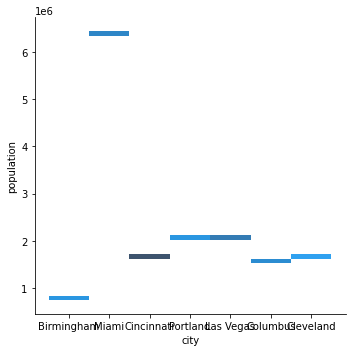

In [ ]:
sns.displot(x=final_df['city'],y=final_df['population'])

* Добавляем координаты центров городов (данные взяты с сайта latlong.net)

In [ ]:
city_centers = {
    'Columbus':(39.983334, -82.983330),
    'Cincinnati':(39.103119, -84.512016),
    'Cleveland':(41.505493, -81.681290),
    'Las Vegas':(36.188110, -115.176468),
    'Miami':(25.761681, -80.191788),
    'Indianapolis':(39.791000, -86.148003),
    'Birmingham':(33.543682, -86.779633),
    'Portland':(45.512794, -122.679565)
}

In [ ]:
lats = final_df['latitude'].tolist()
lons = final_df['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=5)
FastMarkerCluster(data=locations).add_to(map1)
map1

# Step 5. Analysis of the districts of Portland (as the most profitable "start" city from Unit Economics research results) and the choice of the number of restaurants to open

* Adding a file with portland zipcodes from the site https://gis-pdx.opendata.arcgis.com/

In [ ]:
district = pd.read_csv('/content/Business_Districts_OD.csv')

In [ ]:
district.columns = district.columns.str.replace('ZIPCODE', 'postalCode')
district.columns = district.columns.str.replace('NAME', 'district')
district.columns = district.columns.str.replace('TYPE', 'Type_of_disctrict')

In [ ]:
district=district[['postalCode', 'Type_of_disctrict',	'district']]

In [ ]:
portland_df = final_df[final_df['city']=='Portland']
portland_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 56 to 687
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       77 non-null     object 
 1   city          77 non-null     object 
 2   latitude      77 non-null     float64
 3   longitude     77 non-null     float64
 4   postalCode    77 non-null     object 
 5   province      77 non-null     object 
 6   name_of_rest  77 non-null     object 
 7   population    77 non-null     int64  
 8   density       77 non-null     int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 6.0+ KB


In [ ]:
portland_districts = pd.merge(portland_df, district, how='left', on=['postalCode'])

In [ ]:
portland_districts['district'].isna().count()

121

In [ ]:
lats = portland_districts['latitude'].tolist()
lons = portland_districts['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[45.512794, -122.679565], zoom_start=5)
FastMarkerCluster(data=locations).add_to(map1)
map1

Text(0, 0.5, 'count')

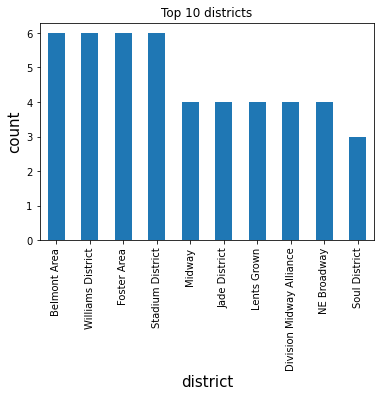

In [ ]:
cityplt=portland_districts.district.value_counts()[:10].plot.bar(title='Top 10 districts')
cityplt.set_xlabel('district',size=15)
cityplt.set_ylabel('count',size=15)

In [ ]:
district_count = portland_districts['district'].value_counts()
district_count.describe()

count    25.000000
mean      2.920000
std       1.730125
min       1.000000
25%       2.000000
50%       2.000000
75%       4.000000
max       6.000000
Name: district, dtype: float64

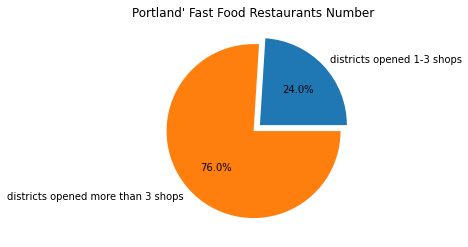

In [ ]:
fig, ax = plt.subplots()
total_districts_with_less_2_rest = len(district_count[district_count < 2])
total_districts_with_greater_equal_4_rests = portland_districts['district'].nunique() - total_districts_with_less_2_rest
values = [total_districts_with_less_2_rest, total_districts_with_greater_equal_4_rests]
ax.pie(values, 
       labels=["districts opened 1-3 shops", "districts opened more than 3 shops"], autopct='%.1f%%', radius=1, 
       explode = (0.1, 0))
ax.set_aspect('equal')
ax.set_title("Portland' Fast Food Restaurants Number")
plt.show()